# Cargar librerías y paquetes

In [1]:
%pip install xgboost
!pip install import_ipynb
!pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor
import import_ipynb
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, get_scorer_names, accuracy_score,confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler ## escalar variables
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import funciones as funciones

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score, mean_squared_error, get_scorer_names, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, DecisionTreeRegressor
from sklearn.metrics import r2_score

import plotly.express as px
import ipywidgets as widgets

from IPython.display import display

from scipy.stats import randint, uniform

import joblib  ### para guardar modelos
import openpyxl
#import a_funciones as funciones  #en caso de usar funcion # para llamarlo en visual Studio

#Despliegeue con dash
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

In [3]:
# Se carga la base de datos creada anteriormente
file_path = 'BD_fallasN.csv'

# Lee el archivo CSV especificando el códec
BD_fallas = pd.read_csv(file_path, encoding='latin1')

# Muestra las primeras filas del DataFrame
BD_fallas.head()

,ConsecutivoOP,ConsecPedido,Cliente,Producto,NombProducto,OCCliente,Actividad,RecMAQ,RecHOM,SecAct,...,Medida sin desgaste en mm2 (RODILLO),Medida actual en mm2 (RODILLO),Porcentaje de desgaste actual % (RODILLO),Altura de la platina en mm,Medida actual de la platina en mm (PLATINA),Porcentaje de desgaste actual % (PLATINA),Paso en mm,Cantidad de pasos,No conformidad,Porcentaje de no conformidad
0,65433,26765,860009808,30351506C,PTNA INT 16X103X301,4530313020,CORT2,OXICORTE Y PLASMA,CORTAR,1,...,NaN,NaN,NaN,102.0,101.0,0.980,177.8,6.0,Desgaste,0.980
1,54312,23311,890100251,1018018,"CDNA FB 864-K443-C2-P7""",4500529054,ENSA,PRENSA ANCLAJES,FORJADO,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ElongaciÃ³n,1.680
2,66729,27177,860009808,30179097,"CDNA FB-6830-K2-C2 P 6""",4500556454,EMPA,BANCO DE TRABAJO DESPACHO,PRODUCTO TERMINADO,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ElongaciÃ³n,0.260
3,67135,27380,860009808,30321162D,PTNA INT ADIT 9.5X152X349,E-MAIL 02/11/2021,ENDE,"PRENSA ANCLAJES, PLATINAS Y TROQUELADORAS",FORJADO,4,...,NaN,NaN,NaN,350.0,349.0,0.286,250.0,6.0,Desgaste,0.286
4,67133,27380,860009808,30321162B,PTNA CAB 9.5X78X349,E-MAIL 02/11/2021,CORT2,OXICORTE Y PLASMA,CORTAR,1,...,NaN,NaN,NaN,350.0,349.0,0.286,250.0,6.0,Desgaste,0.286


In [4]:
BD_fallas.columns

Index(['ConsecutivoOP', 'ConsecPedido', 'Cliente', 'Producto', 'NombProducto',
       'OCCliente', 'Actividad', 'RecMAQ', 'RecHOM', 'SecAct', 'FechEstInicil',
       'estado', 'TipoConsecutivo', 'Fecha de visita', 'Empresa', 'Planta',
       'PaÃ­s', 'Ciudad', 'Tipo de equipo', 'Pedido NÃÂ°', 'Material',
       'Causa de desgaste', 'Si escogiÃ³ otros, Â¿cuÃ¡l?',
       'Escoja el desgaste donde se presenta', 'Tipo de cadena',
       'Referencia cadena',
       'Medida referencia de control desgaste nueva en mm (CADENA)',
       'Medida referencia control de desgaste actual en mm (CADENA)',
       'Porcentaje de elongaciÃ³n actual % (CADENA)',
       'Porcentaje de elongaciÃ³n mÃ¡x % (CADENA)',
       'ProyecciÃ³n en horas de operaciÃ³n restantes (H) (CADENA)',
       'Medida sin desgaste en mm (BUJE)', 'Medida actual en mm1 (BUJE)',
       'Porcentaje de desgaste actual % (BUJE)',
       'Medida sin desgaste en mm1 (PASADOR)', 'Medida actual en mm (PASADOR)',
       'Porcentaje de des

In [5]:
# Lista de las columnas que deseas eliminar
columnas_a_eliminar = [
    'ConsecutivoOP', 'Producto','ConsecPedido', 'Cliente', 'OCCliente', 'SecAct', 'estado',
    'TipoConsecutivo', 'Pedido NÃÂ°', 'Medida referencia de control desgaste nueva en mm (CADENA)', 
    'Medida referencia control de desgaste actual en mm (CADENA)', 'Porcentaje de elongaciÃ³n actual % (CADENA)', 
    'Porcentaje de elongaciÃ³n mÃ¡x % (CADENA)', 'ProyecciÃ³n en horas de operaciÃ³n restantes (H) (CADENA)', 
    'Medida sin desgaste en mm (BUJE)', 'Medida actual en mm1 (BUJE)', 'Porcentaje de desgaste actual % (BUJE)', 
    'Medida sin desgaste en mm1 (PASADOR)', 'Medida actual en mm (PASADOR)', 
    'Porcentaje de desgaste actual % (PASADOR)', 'Medida sin desgaste en mm2 (RODILLO)', 
    'Medida actual en mm2 (RODILLO)', 'Porcentaje de desgaste actual % (RODILLO)', 
    'Altura de la platina en mm', 'Medida actual de la platina en mm (PLATINA)', 
    'Porcentaje de desgaste actual % (PLATINA)', 'Paso en mm', 'Cantidad de pasos'
]

# Generar un nuevo DataFrame eliminando las columnas especificadas
BD_fallasC = BD_fallas.drop(columns=columnas_a_eliminar)

# Verificar las primeras filas del nuevo DataFrame para asegurarte que se eliminaron correctamente
print(BD_fallasC.head())


                NombProducto Actividad  \
0        PTNA INT 16X103X301     CORT2   
1    CDNA FB 864-K443-C2-P7"      ENSA   
2   CDNA FB-6830-K2-C2 P 6"       EMPA   
3  PTNA INT ADIT 9.5X152X349      ENDE   
4        PTNA CAB 9.5X78X349     CORT2   

                                      RecMAQ              RecHOM  \
0                          OXICORTE Y PLASMA              CORTAR   
1                            PRENSA ANCLAJES             FORJADO   
2                  BANCO DE TRABAJO DESPACHO  PRODUCTO TERMINADO   
3  PRENSA ANCLAJES, PLATINAS Y TROQUELADORAS             FORJADO   
4                          OXICORTE Y PLASMA              CORTAR   

  FechEstInicil Fecha de visita Empresa    Planta     PaÃ­s    Ciudad  \
0    2021-08-03      2022-12-05  HOLCIM     NOBSA  COLOMBIA    BOYACA   
1    2019-01-25      2022-03-15   ARGOS  SOGAMOSO  COLOMBIA  SOGAMOSO   
2    2021-10-02      2023-07-07  HOLCIM       NaN  COLOMBIA    BOYACA   
3    2021-11-04      2022-12-05  HOLCIM    BOY

In [6]:
# Observar el DF
BD_fallasC.head()

,NombProducto,Actividad,RecMAQ,RecHOM,FechEstInicil,Fecha de visita,Empresa,Planta,PaÃ­s,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogiÃ³ otros, Â¿cuÃ¡l?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad
0,PTNA INT 16X103X301,CORT2,OXICORTE Y PLASMA,CORTAR,2021-08-03,2022-12-05,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;DesalineaciÃ³n;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.980
1,"CDNA FB 864-K443-C2-P7""",ENSA,PRENSA ANCLAJES,FORJADO,2019-01-25,2022-03-15,ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;CavitaciÃ³n seca,NaN,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,ElongaciÃ³n,1.680
2,"CDNA FB-6830-K2-C2 P 6""",EMPA,BANCO DE TRABAJO DESPACHO,PRODUCTO TERMINADO,2021-10-02,2023-07-07,HOLCIM,NaN,COLOMBIA,BOYACA,Elevador cangilones,DESCONOCIDO,DesalineaciÃ³n,NaN,Platina Externa,"CDNA FB-6830-K2-C2 P 6""",FB-683,ElongaciÃ³n,0.260
3,PTNA INT ADIT 9.5X152X349,ENDE,"PRENSA ANCLAJES, PLATINAS Y TROQUELADORAS",FORJADO,2021-11-04,2022-12-05,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286
4,PTNA CAB 9.5X78X349,CORT2,OXICORTE Y PLASMA,CORTAR,2021-11-04,2022-12-05,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286


In [7]:
# Se verifica el tipo de variable
BD_fallasC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   NombProducto                          47 non-null     object 
 1   Actividad                             47 non-null     object 
 2   RecMAQ                                47 non-null     object 
 3   RecHOM                                47 non-null     object 
 4   FechEstInicil                         47 non-null     object 
 5   Fecha de visita                       47 non-null     object 
 6   Empresa                               47 non-null     object 
 7   Planta                                46 non-null     object 
 8   PaÃ­s                                 47 non-null     object 
 9   Ciudad                                47 non-null     object 
 10  Tipo de equipo                        47 non-null     object 
 11  Material             

In [8]:
# cambio de formato de fecha

# Convertir las columnas 'FechEstInicil' y 'Fecha de visita' a formato datetime
BD_fallasC['FechEstInicil'] = pd.to_datetime(BD_fallasC['FechEstInicil'], errors='coerce')
BD_fallasC['Fecha de visita'] = pd.to_datetime(BD_fallasC['Fecha de visita'], errors='coerce')

# Crear una nueva columna 'Tiempo hasta falla' que sea la diferencia en días entre 'FechEstInicil' y 'Fecha de visita'
BD_fallasC['Tiempo hasta falla (Dias)'] = (BD_fallasC['Fecha de visita'] - BD_fallasC['FechEstInicil']).dt.days

# Verificar las primeras filas para asegurarse de que todo esté correcto
BD_fallasC.head()


,NombProducto,Actividad,RecMAQ,RecHOM,FechEstInicil,Fecha de visita,Empresa,Planta,PaÃ­s,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogiÃ³ otros, Â¿cuÃ¡l?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
0,PTNA INT 16X103X301,CORT2,OXICORTE Y PLASMA,CORTAR,2021-08-03,2022-12-05,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;DesalineaciÃ³n;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.980,489
1,"CDNA FB 864-K443-C2-P7""",ENSA,PRENSA ANCLAJES,FORJADO,2019-01-25,2022-03-15,ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;CavitaciÃ³n seca,NaN,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,ElongaciÃ³n,1.680,1145
2,"CDNA FB-6830-K2-C2 P 6""",EMPA,BANCO DE TRABAJO DESPACHO,PRODUCTO TERMINADO,2021-10-02,2023-07-07,HOLCIM,NaN,COLOMBIA,BOYACA,Elevador cangilones,DESCONOCIDO,DesalineaciÃ³n,NaN,Platina Externa,"CDNA FB-6830-K2-C2 P 6""",FB-683,ElongaciÃ³n,0.260,643
3,PTNA INT ADIT 9.5X152X349,ENDE,"PRENSA ANCLAJES, PLATINAS Y TROQUELADORAS",FORJADO,2021-11-04,2022-12-05,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396
4,PTNA CAB 9.5X78X349,CORT2,OXICORTE Y PLASMA,CORTAR,2021-11-04,2022-12-05,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396


In [9]:
# Lista de las columnas que deseas eliminar
columnas_a_eliminar2 = [
    'FechEstInicil', 'Fecha de visita'
]

# Generar un nuevo DataFrame eliminando las columnas especificadas
BD_fallasD = BD_fallasC.drop(columns=columnas_a_eliminar2)

# Verificar las primeras filas del nuevo DataFrame para asegurarte que se eliminaron correctamente
BD_fallasD.head()


,NombProducto,Actividad,RecMAQ,RecHOM,Empresa,Planta,PaÃ­s,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogiÃ³ otros, Â¿cuÃ¡l?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
0,PTNA INT 16X103X301,CORT2,OXICORTE Y PLASMA,CORTAR,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;DesalineaciÃ³n;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.980,489
1,"CDNA FB 864-K443-C2-P7""",ENSA,PRENSA ANCLAJES,FORJADO,ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;CavitaciÃ³n seca,NaN,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,ElongaciÃ³n,1.680,1145
2,"CDNA FB-6830-K2-C2 P 6""",EMPA,BANCO DE TRABAJO DESPACHO,PRODUCTO TERMINADO,HOLCIM,NaN,COLOMBIA,BOYACA,Elevador cangilones,DESCONOCIDO,DesalineaciÃ³n,NaN,Platina Externa,"CDNA FB-6830-K2-C2 P 6""",FB-683,ElongaciÃ³n,0.260,643
3,PTNA INT ADIT 9.5X152X349,ENDE,"PRENSA ANCLAJES, PLATINAS Y TROQUELADORAS",FORJADO,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396
4,PTNA CAB 9.5X78X349,CORT2,OXICORTE Y PLASMA,CORTAR,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396


In [10]:
# Verificación de nulos
print("\nNúmero de datos faltantes por columna:")
print(BD_fallasD.isnull().sum())


Número de datos faltantes por columna:
NombProducto                             0
Actividad                                0
RecMAQ                                   0
RecHOM                                   0
Empresa                                  0
Planta                                   1
PaÃ­s                                    0
Ciudad                                   0
Tipo de equipo                           0
Material                                 0
Causa de desgaste                        6
Si escogiÃ³ otros, Â¿cuÃ¡l?             11
Escoja el desgaste donde se presenta     0
Tipo de cadena                           0
Referencia cadena                        0
No conformidad                           0
Porcentaje de no conformidad             0
Tiempo hasta falla (Dias)                0
dtype: int64


In [11]:
# Rellenar los valores nulos con la cadena 'No Aplica'
BD_fallasD = BD_fallasD.fillna('No Aplica')

# Verificar las primeras filas para asegurarte que los nulos fueron reemplazados
BD_fallasD.head()

,NombProducto,Actividad,RecMAQ,RecHOM,Empresa,Planta,PaÃ­s,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogiÃ³ otros, Â¿cuÃ¡l?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
0,PTNA INT 16X103X301,CORT2,OXICORTE Y PLASMA,CORTAR,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;DesalineaciÃ³n;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.980,489
1,"CDNA FB 864-K443-C2-P7""",ENSA,PRENSA ANCLAJES,FORJADO,ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;CavitaciÃ³n seca,No Aplica,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,ElongaciÃ³n,1.680,1145
2,"CDNA FB-6830-K2-C2 P 6""",EMPA,BANCO DE TRABAJO DESPACHO,PRODUCTO TERMINADO,HOLCIM,No Aplica,COLOMBIA,BOYACA,Elevador cangilones,DESCONOCIDO,DesalineaciÃ³n,No Aplica,Platina Externa,"CDNA FB-6830-K2-C2 P 6""",FB-683,ElongaciÃ³n,0.260,643
3,PTNA INT ADIT 9.5X152X349,ENDE,"PRENSA ANCLAJES, PLATINAS Y TROQUELADORAS",FORJADO,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396
4,PTNA CAB 9.5X78X349,CORT2,OXICORTE Y PLASMA,CORTAR,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396


In [12]:
# Renombrar las columnas mal escritas
BD_fallasD = BD_fallasD.rename(columns={
    'PaÃ­s': 'País',
    'Si escogiÃ³ otros, Â¿cuÃ¡l?': 'Si escogió otros, ¿cuál?'
})

# Verificar las primeras filas para asegurarte de que las columnas fueron renombradas
BD_fallasD.head()

,NombProducto,Actividad,RecMAQ,RecHOM,Empresa,Planta,País,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogió otros, ¿cuál?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
0,PTNA INT 16X103X301,CORT2,OXICORTE Y PLASMA,CORTAR,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;DesalineaciÃ³n;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.980,489
1,"CDNA FB 864-K443-C2-P7""",ENSA,PRENSA ANCLAJES,FORJADO,ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;CavitaciÃ³n seca,No Aplica,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,ElongaciÃ³n,1.680,1145
2,"CDNA FB-6830-K2-C2 P 6""",EMPA,BANCO DE TRABAJO DESPACHO,PRODUCTO TERMINADO,HOLCIM,No Aplica,COLOMBIA,BOYACA,Elevador cangilones,DESCONOCIDO,DesalineaciÃ³n,No Aplica,Platina Externa,"CDNA FB-6830-K2-C2 P 6""",FB-683,ElongaciÃ³n,0.260,643
3,PTNA INT ADIT 9.5X152X349,ENDE,"PRENSA ANCLAJES, PLATINAS Y TROQUELADORAS",FORJADO,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396
4,PTNA CAB 9.5X78X349,CORT2,OXICORTE Y PLASMA,CORTAR,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396


In [13]:
# Verificamos nulos nuevamente
print("\nNúmero de datos faltantes por columna:")
print(BD_fallasD.isnull().sum())


Número de datos faltantes por columna:
NombProducto                            0
Actividad                               0
RecMAQ                                  0
RecHOM                                  0
Empresa                                 0
Planta                                  0
País                                    0
Ciudad                                  0
Tipo de equipo                          0
Material                                0
Causa de desgaste                       0
Si escogió otros, ¿cuál?                0
Escoja el desgaste donde se presenta    0
Tipo de cadena                          0
Referencia cadena                       0
No conformidad                          0
Porcentaje de no conformidad            0
Tiempo hasta falla (Dias)               0
dtype: int64


In [14]:
# eliminar variables que no se necesitan
BD_fallasD = BD_fallasD.drop(['Actividad','RecMAQ','RecHOM'], axis=1)
BD_fallasD.head()

,NombProducto,Empresa,Planta,País,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogió otros, ¿cuál?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
0,PTNA INT 16X103X301,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;DesalineaciÃ³n;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.980,489
1,"CDNA FB 864-K443-C2-P7""",ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;CavitaciÃ³n seca,No Aplica,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,ElongaciÃ³n,1.680,1145
2,"CDNA FB-6830-K2-C2 P 6""",HOLCIM,No Aplica,COLOMBIA,BOYACA,Elevador cangilones,DESCONOCIDO,DesalineaciÃ³n,No Aplica,Platina Externa,"CDNA FB-6830-K2-C2 P 6""",FB-683,ElongaciÃ³n,0.260,643
3,PTNA INT ADIT 9.5X152X349,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396
4,PTNA CAB 9.5X78X349,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396


In [15]:
# Función personalizada para revisar y reemplazar los valores de la columna 'NombProducto'
def reemplazar_producto(nombre):
    if 'PTNA' in nombre:
        return 'PLATINA'
    elif 'BUJE' in nombre:
        return 'BUJE'
    elif 'CDNA' in nombre:
        return 'CADENA'
    elif 'PASADOR' in nombre:
        return 'PASADOR'
    elif 'RODILLO' in nombre:
        return 'RODILLO'
    else:
        return nombre  # Si no coincide con ninguna palabra, mantener el valor original

# Aplicar la función a la columna 'NombProducto'
BD_fallasD['NombProducto'] = BD_fallasD['NombProducto'].apply(reemplazar_producto)

# Verificar las primeras filas para asegurarte de que los cambios se realizaron correctamente
BD_fallasD.head()


,NombProducto,Empresa,Planta,País,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogió otros, ¿cuál?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
0,PLATINA,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;DesalineaciÃ³n;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.980,489
1,CADENA,ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;CavitaciÃ³n seca,No Aplica,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,ElongaciÃ³n,1.680,1145
2,CADENA,HOLCIM,No Aplica,COLOMBIA,BOYACA,Elevador cangilones,DESCONOCIDO,DesalineaciÃ³n,No Aplica,Platina Externa,"CDNA FB-6830-K2-C2 P 6""",FB-683,ElongaciÃ³n,0.260,643
3,PLATINA,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396
4,PLATINA,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396


In [16]:
# Analizar valores unicos de variables mal escritas o con problemas numericos 

# Para los valores únicos de cada columna
valores_causa_desgaste = BD_fallasD['Causa de desgaste'].unique()
valores_no_conformidad = BD_fallasD['No conformidad'].unique()
valores_tiempo_hasta_falla = BD_fallasD['Tiempo hasta falla (Dias)'].unique()

# Imprimir resultados
print("Valores únicos en 'Causa de desgaste':", valores_causa_desgaste)
print("Valores únicos en 'No conformidad':", valores_no_conformidad)
print("Valores únicos en 'Tiempo hasta falla (Dias)':", valores_tiempo_hasta_falla)


Valores únicos en 'Causa de desgaste': ['ElongaciÃ³n prematura;DesalineaciÃ³n;Otros'
 'ElongaciÃ³n prematura;CavitaciÃ³n seca' 'DesalineaciÃ³n'
 'ElongaciÃ³n prematura;Otros' 'CavitaciÃ³n seca' 'Otros'
 'DesalineaciÃ³n;ElongaciÃ³n prematura;Otros;Falta de lubricaciÃ³n;Ruptura'
 'Velocidad incorrecta;DesalineaciÃ³n'
 'DesalineaciÃ³n;CavitaciÃ³n seca;Otros' 'No Aplica'
 'Medidas fuera de especificaciÃ³n' 'Ruptura' 'ElongaciÃ³n prematura'
 'Falta de lubricaciÃ³n']
Valores únicos en 'No conformidad': ['Desgaste' 'ElongaciÃ³n']
Valores únicos en 'Tiempo hasta falla (Dias)': [ 489 1145  643  396  883  982  278  499  276  343  -19 -181  196  178
  426  342  846 -140  894  522  592  521  806  166  -45]


In [17]:
# Corrección de valores mal escritos
# Diccionario de correcciones para 'No conformidad'
correcciones_no_conformidad = {
    'ElongaciÃ³n': 'Elongación',
    'Desgaste': 'Desgaste'  # Asegúrate de incluir otras posibles variaciones aquí
}

# Diccionario de correcciones para 'Causa de desgaste'
correcciones_causa_desgaste = {
    'ElongaciÃ³n prematura': 'Elongación prematura',
    'DesalineaciÃ³n': 'Desalineación',
    'CavitaciÃ³n seca': 'Cavitación seca',
    'Falta de lubricaciÃ³n': 'Falta de lubricación',
    'Medidas fuera de especificaciÃ³n': 'Medidas fuera de especificación',
    'Ruptura': 'Ruptura',
    'Velocidad incorrecta': 'Velocidad incorrecta',
    'Otros': 'Otros',
    'No Aplica': 'No Aplica'
}

# Aplicar las correcciones en ambas columnas
BD_fallasD['No conformidad'] = BD_fallasD['No conformidad'].replace(correcciones_no_conformidad)
BD_fallasD['Causa de desgaste'] = BD_fallasD['Causa de desgaste'].replace(correcciones_causa_desgaste, regex=True)

# Verificar los cambios
print("Valores únicos corregidos en 'No conformidad':", BD_fallasD['No conformidad'].unique())
print("Valores únicos corregidos en 'Causa de desgaste':", BD_fallasD['Causa de desgaste'].unique())


Valores únicos corregidos en 'No conformidad': ['Desgaste' 'Elongación']
Valores únicos corregidos en 'Causa de desgaste': ['Elongación prematura;Desalineación;Otros'
 'Elongación prematura;Cavitación seca' 'Desalineación'
 'Elongación prematura;Otros' 'Cavitación seca' 'Otros'
 'Desalineación;Elongación prematura;Otros;Falta de lubricación;Ruptura'
 'Velocidad incorrecta;Desalineación'
 'Desalineación;Cavitación seca;Otros' 'No Aplica'
 'Medidas fuera de especificación' 'Ruptura' 'Elongación prematura'
 'Falta de lubricación']


In [18]:
# Correción de valores negativos
# Convertir todos los valores a su valor absoluto en la columna 'Tiempo hasta falla (Dias)'
BD_fallasD['Tiempo hasta falla (Dias)'] = BD_fallasD['Tiempo hasta falla (Dias)'].abs()

# Verificar los cambios
print("Valores únicos en 'Tiempo hasta falla (Dias)' (convertidos a positivos):", BD_fallasD['Tiempo hasta falla (Dias)'].unique())


Valores únicos en 'Tiempo hasta falla (Dias)' (convertidos a positivos): [ 489 1145  643  396  883  982  278  499  276  343   19  181  196  178
  426  342  846  140  894  522  592  521  806  166   45]


In [19]:
BD_fallasD.head()

,NombProducto,Empresa,Planta,País,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogió otros, ¿cuál?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
0,PLATINA,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,Elongación prematura;Desalineación;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.980,489
1,CADENA,ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,Elongación prematura;Cavitación seca,No Aplica,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,Elongación,1.680,1145
2,CADENA,HOLCIM,No Aplica,COLOMBIA,BOYACA,Elevador cangilones,DESCONOCIDO,Desalineación,No Aplica,Platina Externa,"CDNA FB-6830-K2-C2 P 6""",FB-683,Elongación,0.260,643
3,PLATINA,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,Elongación prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396
4,PLATINA,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,Elongación prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396


In [20]:
# Para obtener los valores únicos de todas las columnas en BD_fallasD
for column in BD_fallasD.columns:
    unique_values = BD_fallasD[column].unique()
    print(f"Valores únicos en '{column}':\n", unique_values, "\n")


Valores únicos en 'NombProducto':
 ['PLATINA' 'CADENA' 'BUJE' 'RODILLO' 'PASADOR'] 

Valores únicos en 'Empresa':
 ['HOLCIM' 'ARGOS' 'MANUELITA' 'CEMEX' 'INGENIO MANUELITA'
 'HOLCIM COLOMBIA' 'INGENIO RISARALDA'] 

Valores únicos en 'Planta':
 ['NOBSA' 'SOGAMOSO' 'No Aplica' 'BOYACA' 'HERMOSILLO' 'ZONA FRANCA'
 'MERIDA' 'PALMAR DE ALTAMIRA' 'CALZADA LARGA' 'TECOMÃ\x83Â\x81N'
 'PAZ DEL RIO' 'COLOMBIA' 'HOLCIM COLOMBIA - NOBSA' 'HOLCIM COLOMBIA'
 'RISARALDA'] 

Valores únicos en 'País':
 ['COLOMBIA' 'MEXICO' 'PANAMÃ\x81'] 

Valores únicos en 'Ciudad':
 ['BOYACA' 'SOGAMOSO' 'HERMOSILLO' 'CARTAGENA' 'MERIDA' 'CALI' 'CAIMITILLO'
 'COLIMA' 'NOBSA' 'BOYACÃ\x83Â\x81' 'BALBOA'] 

Valores únicos en 'Tipo de equipo':
 ['Elevador cangilones' 'Reclamador y apilador' 'Tansportador de tablilla'] 

Valores únicos en 'Material':
 ['CLINKER' 'DESCONOCIDO' 'PIEDRA CALIZA' 'PUZOLANA, CALIZA' 'CORRECTORES'
 'CAÃ\x91A' 'COMBUSTIBLES ALTERNOS' 'CEMENTO' 'CARBÃ\x93N GRANULADO'
 'HARINA CRUDA'] 

Valores único

In [21]:
# Se verifican valores unicos
BD_fallasD['NombProducto'].unique

<bound method Series.unique of 0     PLATINA
1      CADENA
2      CADENA
3     PLATINA
4     PLATINA
5        BUJE
6     PLATINA
7     RODILLO
8        BUJE
9      CADENA
10    PASADOR
11     CADENA
12     CADENA
13    RODILLO
14       BUJE
15     CADENA
16    PLATINA
17       BUJE
18     CADENA
19       BUJE
20    PLATINA
21       BUJE
22    PASADOR
23       BUJE
24     CADENA
25    PASADOR
26    PASADOR
27       BUJE
28       BUJE
29       BUJE
30    PLATINA
31       BUJE
32     CADENA
33       BUJE
34     CADENA
35     CADENA
36    PASADOR
37     CADENA
38     CADENA
39    PLATINA
40    PLATINA
41    PASADOR
42     CADENA
43    PASADOR
44     CADENA
45       BUJE
46     CADENA
Name: NombProducto, dtype: object>

In [22]:
# Verificación de tamaño
BD_fallasD.shape

(47, 15)

In [23]:
### Remosión de variables experimentales con alta dispersión
# Eliminar las columnas 'Escoja el desgaste donde se presenta' y 'Tipo de cadena'
#BD_fallasD = BD_fallasD.drop(['Escoja el desgaste donde se presenta', 'Tipo de cadena'], axis=1)

# Verificar que se eliminaron
#print("Columnas después de eliminar:", BD_fallasD.columns)


In [24]:
# Remosión de outliers 
# Lista de valores a eliminar
valores_a_eliminar = [18.69, 6.11, 9.48, 4.97, 4, 3.38, 3.25, 3.09]

# Filtrar el DataFrame para eliminar filas con esos valores en 'Porcentaje de no conformidad'
BD_fallasD = BD_fallasD[~BD_fallasD['Porcentaje de no conformidad'].isin(valores_a_eliminar)]

# Verificar que se eliminaron las filas
print("Valores únicos en 'Porcentaje de no conformidad':", BD_fallasD['Porcentaje de no conformidad'].unique())


Valores únicos en 'Porcentaje de no conformidad': [0.98  1.68  0.26  0.286 1.1   2.    0.14  1.25  0.47  0.18  2.3   0.45
 0.61  0.31  0.58  0.22  0.    0.92  0.32  0.11  1.77  0.34  0.36  0.88
 0.38  0.5  ]


# Convertir a Dummies

In [25]:
df_dummies = BD_fallasD.copy()

In [26]:
# Identificar las columnas categóricas
cat = df_dummies.select_dtypes(include=['object']).columns

# Iterar a través de las columnas categóricas y mostrar las categorías únicas
for column in cat:
    unique_categories = df_dummies[column].unique()
    print(f'Categorías en "{column}": {unique_categories}')

Categorías en "NombProducto": ['PLATINA' 'CADENA' 'BUJE' 'PASADOR']
Categorías en "Empresa": ['HOLCIM' 'ARGOS' 'CEMEX' 'MANUELITA' 'INGENIO MANUELITA'
 'HOLCIM COLOMBIA']
Categorías en "Planta": ['NOBSA' 'SOGAMOSO' 'No Aplica' 'BOYACA' 'HERMOSILLO' 'MERIDA'
 'CALZADA LARGA' 'PALMAR DE ALTAMIRA' 'TECOMÃ\x83Â\x81N' 'ZONA FRANCA'
 'PAZ DEL RIO' 'COLOMBIA' 'HOLCIM COLOMBIA - NOBSA' 'HOLCIM COLOMBIA']
Categorías en "País": ['COLOMBIA' 'MEXICO' 'PANAMÃ\x81']
Categorías en "Ciudad": ['BOYACA' 'SOGAMOSO' 'HERMOSILLO' 'MERIDA' 'CAIMITILLO' 'CALI' 'COLIMA'
 'CARTAGENA' 'NOBSA' 'BOYACÃ\x83Â\x81']
Categorías en "Tipo de equipo": ['Elevador cangilones' 'Reclamador y apilador' 'Tansportador de tablilla']
Categorías en "Material": ['CLINKER' 'DESCONOCIDO' 'PIEDRA CALIZA' 'PUZOLANA, CALIZA'
 'COMBUSTIBLES ALTERNOS' 'CAÃ\x91A' 'CEMENTO' 'CARBÃ\x93N GRANULADO'
 'HARINA CRUDA']
Categorías en "Causa de desgaste": ['Elongación prematura;Desalineación;Otros'
 'Elongación prematura;Cavitación seca' 'Desaline

In [27]:
list_dummies = cat.difference(['Empresa','Planta', 'País', 'Ciudad'])
list_dummies

Index(['Causa de desgaste', 'Escoja el desgaste donde se presenta', 'Material',
       'No conformidad', 'NombProducto', 'Referencia cadena',
       'Si escogió otros, ¿cuál?', 'Tipo de cadena', 'Tipo de equipo'],
      dtype='object')

In [28]:
# Crear un objeto LabelEncoder
le = LabelEncoder()

# Iterar a través de las columnas categóricas y aplicar LabelEncoder si hay 2 categorías
for column in cat:
    if len(df_dummies[column].unique()) == 2:  # Verificar si hay solo 2 categorías
       df_dummies[column] = le.fit_transform(df_dummies[column])

# Variables con mas de 2 categorias
df_dummies_2 = pd.get_dummies(df_dummies)

In [29]:
# verificción de dummies
df_dummies_2

,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias),NombProducto_BUJE,NombProducto_CADENA,NombProducto_PASADOR,NombProducto_PLATINA,Empresa_ARGOS,Empresa_CEMEX,Empresa_HOLCIM,...,Referencia cadena_FB 984,Referencia cadena_FB 994,Referencia cadena_FB AU06.3,Referencia cadena_FB-683,Referencia cadena_FB-SJM-984,Referencia cadena_FB2198,Referencia cadena_FB311,Referencia cadena_FB425,Referencia cadena_FB864,Referencia cadena_FB984
0,0,0.980,489,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,1,1.680,1145,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1,0.260,643,False,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
3,0,0.286,396,False,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,0,0.286,396,False,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
5,0,1.100,883,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
6,0,0.286,396,False,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
8,0,2.000,396,True,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
9,1,0.140,278,False,True,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
10,0,1.250,883,False,False,True,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False


# Escalado y/o estandarización de los datos

In [30]:
######## con base en los modelos candidatos se realizará una selección de variables ########
y = df_dummies_2['Porcentaje de no conformidad']
X1 = df_dummies_2.loc[:, ~df_dummies_2.columns.isin(['Porcentaje de no conformidad'])]
scaler=StandardScaler()
scaler.fit(X1)
X2=scaler.transform(X1)
X=pd.DataFrame(X2,columns=X1.columns)

Árbol de decisión

|--- Tipo de cadena_CDNA FB 311-TK1-C2-P250 <= 2.00
|   |--- Tiempo hasta falla (Dias) <= 1.70
|   |   |--- Causa de desgaste_Otros <= 0.81
|   |   |   |--- value: [0.55]
|   |   |--- Causa de desgaste_Otros >  0.81
|   |   |   |--- value: [0.21]
|   |--- Tiempo hasta falla (Dias) >  1.70
|   |   |--- Material_CLINKER <= 0.40
|   |   |   |--- value: [1.77]
|   |   |--- Material_CLINKER >  0.40
|   |   |   |--- value: [1.68]
|--- Tipo de cadena_CDNA FB 311-TK1-C2-P250 >  2.00
|   |--- value: [2.30]



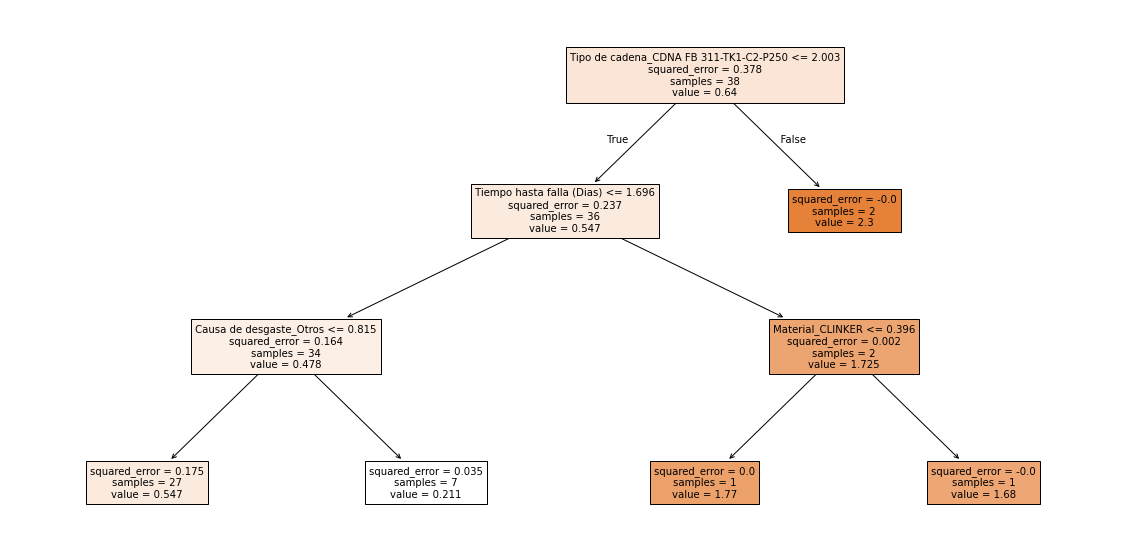

In [31]:
# Crear y entrenar el modelo de árbol de decisión para regresión
rtree = DecisionTreeRegressor(max_depth=3)
rtree.fit(X=X, y=y)

# Generar una representación de texto del árbol de decisión
tree_text = export_text(rtree, feature_names=X.columns.tolist())
print(tree_text)

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(rtree, feature_names=X.columns.tolist(), filled=True)
plt.show()

Modelos candidatos

In [32]:
# Define los modelos de regresión seleccionados
m_linreg = LinearRegression()
m_tree_reg = DecisionTreeRegressor()
m_rf_reg = RandomForestRegressor()
m_gbt_reg = GradientBoostingRegressor()

# Lista de modelos de regresión seleccionados
modelos_reg = [ m_linreg, m_tree_reg, m_rf_reg, m_gbt_reg]

Selección de variables

In [33]:
# Ahora, utiliza estos modelos para seleccionar las variables
var_names = funciones.sel_variables(modelos_reg, X, y, threshold="2*mean")
X2=X[var_names] ### matriz con variables seleccionadas
X2.info()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 21 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Causa de desgaste_Otros                                                       38 non-null     float64
 1   Ciudad_HERMOSILLO                                                             38 non-null     float64
 2   Empresa_ARGOS                                                                 38 non-null     float64
 3   Escoja el desgaste donde se presenta_Platina Interna;Platina Externa;Rodillo  38 non-null     float64
 4   No conformidad                                                                38 non-null     float64
 5   NombProducto_BUJE                                                             38 non-null     float64
 6   NombProducto_PASADOR                

Definir modelo ganador

In [34]:
def medir_modelos(modelos, X, y, cv):
    resultados = {}
    for modelo in modelos:
        nombre_modelo = type(modelo).__name__
        scores = cross_val_score(modelo, X, y, cv=cv, scoring='neg_mean_squared_error')
        mse_scores = -scores  # Convertir puntuaciones negativas a positivas
        resultados[nombre_modelo] = mse_scores.mean()
    return resultados

# Calcular MSE para todos los modelos con todas las variables
mse_scores_all = medir_modelos(modelos_reg, X, y, 30)

# Calcular MSE para todos los modelos con variables seleccionadas
mse_scores_varsel = medir_modelos(modelos_reg, X2, y, 30)

print("MSE para todos los modelos con todas las variables:")
for modelo, mse_score in mse_scores_all.items():
    print(f"{modelo}: {mse_score}")

print("\nMSE para todos los modelos con variables seleccionadas:")
for modelo, mse_score in mse_scores_varsel.items():
    print(f"{modelo}: {mse_score}")

MSE para todos los modelos con todas las variables:
LinearRegression: 1.6834818713172758e+26
DecisionTreeRegressor: 0.2389558
RandomForestRegressor: 0.20959878111333316
GradientBoostingRegressor: 0.2087994196161145

MSE para todos los modelos con variables seleccionadas:
LinearRegression: 0.22250126882430502
DecisionTreeRegressor: 0.2874592
RandomForestRegressor: 0.22098386179333307
GradientBoostingRegressor: 0.19470453920931816


In [35]:
# Calculamos el R2, para verificar el comportamiento de los modelos (3 minutos de ejecución)

def medir_modelos_r2(modelos, X, y, cv=30):
    resultados = {}
    for modelo in modelos:
        nombre_modelo = type(modelo).__name__
        scores = cross_val_score(modelo, X, y, cv=cv, scoring='r2')
        resultados[nombre_modelo] = scores.mean()
    return resultados

# Define los modelos de regresión seleccionados
m_linreg = LinearRegression()
m_tree_reg = DecisionTreeRegressor()
m_rf_reg = RandomForestRegressor()
m_gbt_reg = GradientBoostingRegressor()

# Lista de modelos de regresión seleccionados
modelos_reg = [m_linreg, m_tree_reg, m_rf_reg, m_gbt_reg]

# Calcular R2 para todos los modelos con todas las variables
r2scores_all = medir_modelos_r2(modelos_reg, X, y, cv=5)

# Calcular R2 para todos los modelos con variables seleccionadas
r2scores_varsel = medir_modelos_r2(modelos_reg, X2, y, cv=5)

print("R2 para todos los modelos con todas las variables:")
for modelo, r2_score in r2scores_all.items():
    print(f"{modelo}: {r2_score}")

print("\nR2 para todos los modelos con variables seleccionadas:")
for modelo, r2_score in r2scores_varsel.items():
    print(f"{modelo}: {r2_score}")

R2 para todos los modelos con todas las variables:
LinearRegression: -1.5426957929340205e+28
DecisionTreeRegressor: 0.14077192655660636
RandomForestRegressor: 0.3192511732103967
GradientBoostingRegressor: 0.391464929962854

R2 para todos los modelos con variables seleccionadas:
LinearRegression: 0.0519140430132393
DecisionTreeRegressor: 0.2267426427295851
RandomForestRegressor: 0.3926519026410756
GradientBoostingRegressor: 0.37881234380226897


###  Conclusiones Generales

Modelos no lineales como Random Forest y Gradient Boosting parecen ser más efectivos en el conjunto de datos, especialmente con la selección de variables.

La regresión lineal no está funcionando adecuadamente, posiblemente debido a colienalidad de las variables.

la optimización de hiperparámetros o el uso de técnicas de validación cruzada podria obtener una mejor evaluación del rendimiento.

# Afinamiento de hiperparámetros

In [36]:
# Definir el modelo con las mejores métricas
gb_model = GradientBoostingRegressor() #(12 minutos de ejecución)

# Definir el grid de hiperparámetros con distribuciones para la búsqueda aleatoria
param_dist = {
    'n_estimators': randint(100, 300),
    'learning_rate': uniform(0.01, 0.3),  # Se usa una distribución uniforme para el learning rate
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'subsample': uniform(0.7, 0.3)  # Se usa una distribución uniforme para el subsample
}

# Configurar la búsqueda aleatoria
gb_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='r2', n_jobs=-1, random_state=42)
                                    #Se pone solo 10 iteraciones por el tiempo computacional y el tamaño del conjunto de datos
# Realizar la búsqueda
gb_search.fit(X, y)

# Obtener los mejores hiperparámetros
best_params_gb = gb_search.best_params_
best_score_gb = gb_search.best_score_

print(f"Mejores hiperparámetros gb: {best_params_gb}")
print(f"Mejor R2 gb: {best_score_gb}")

Mejores hiperparámetros gb: {'learning_rate': 0.12236203565420874, 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 171, 'subsample': 0.8795975452591109}
Mejor R2 gb: 0.06808304408422179


Con estos parámetros, se obtuvo un coeficiente de determinación (R2) de aproximadamente 0.094, lo que sugiere que el modelo es capaz de explicar alrededor del 9.45% de la variabilidad en los datos de manera satisfactoria. Aunque el rendimiento del modelo no es el mejor, estos resultados proporcionan una base para continuar con el análisis y la evaluación del modelo.

In [37]:
 #Consideramos también el afinamiento del modelo random forest, ya que la diferencia no era muy significativa y tiene menor exigencia computacional.
# Definir el modelo
rf_model = RandomForestRegressor() #(6 minutos de ejecución)

# Definir el grid de hiperparámetros con distribuciones para la búsqueda aleatoria
param_dist = {
    'n_estimators': randint(100, 300),
    'max_features': ['sqrt', 'log2'],
    'max_depth': randint(10, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'bootstrap': [True, False]
}

# Configurar la búsqueda aleatoria
rf_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='r2', n_jobs=-1, random_state=42)
                                    #Se pone solo 10 iteraciones por el tiempo computacional y el tamaño del conjunto de datos
# Realizar la búsqueda
rf_search.fit(X, y)

# Obtener los mejores hiperparámetros
best_params_rf = rf_search.best_params_
best_score_rf = rf_search.best_score_

print(f"Mejores hiperparámetros rf: {best_params_rf}")
print(f"Mejor R2 rf: {best_score_rf}")

Mejores hiperparámetros rf: {'bootstrap': False, 'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 183}
Mejor R2 rf: 0.24760305778293726


Con estos hiperparámetros, el modelo alcanzó un coeficiente de determinación (R2) de aproximadamente 0.2503, lo que sugiere que es capaz de explicar alrededor del 25.03% de la variabilidad en los datos de manera satisfactoria.

### Evaluación y selección del modelo

In [38]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos con los mejores hiperparámetros obtenidos
best_gb_model = GradientBoostingRegressor(**best_params_gb)
best_rf_model = RandomForestRegressor(**best_params_rf)

# Entrenar los modelos con los datos de entrenamiento
best_gb_model.fit(X_train, y_train)
best_rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_gb = best_gb_model.predict(X_test)
y_pred_rf = best_rf_model.predict(X_test)

In [39]:
from sklearn.metrics import r2_score
# Calcular el R2 en el conjunto de prueba
r2_gb = r2_score(y_test, y_pred_gb)
r2_rf = r2_score(y_test, y_pred_rf)

# Comparar los puntajes R2 para determinar el mejor modelo
if r2_gb > r2_rf:
    best_model = best_gb_model
    best_model_name = 'Gradient Boosting'
    best_r2 = r2_gb
else:
    best_model = best_rf_model
    best_model_name = 'Random Forest'
    best_r2 = r2_rf

# Mostrar resultados
print(f"Resultados de la evaluación y selección del modelo:")
print(f"Mejor modelo: {best_model_name}")
print(f"R2 en conjunto de prueba: {best_r2}")

Resultados de la evaluación y selección del modelo:
Mejor modelo: Random Forest
R2 en conjunto de prueba: -16.545143523551438


In [40]:
# Guardar el modelo seleccionado (GradientBoostingRegressor en este caso)
joblib.dump(best_model, 'GradientBoostingRegressor_model.pkl')

['GradientBoostingRegressor_model.pkl']

In [41]:
#Guardar el conjunto de entrenamiento
X_train.to_csv('X_train.csv', index=False)

# Despliegue del modelo

In [42]:
# Obtener las características utilizadas en el entrenamiento del modelo
features_used = X_train.columns.tolist()
print("Características utilizadas en el entrenamiento del modelo:")
print(features_used)

Características utilizadas en el entrenamiento del modelo:
['No conformidad', 'Tiempo hasta falla (Dias)', 'NombProducto_BUJE', 'NombProducto_CADENA', 'NombProducto_PASADOR', 'NombProducto_PLATINA', 'Empresa_ARGOS', 'Empresa_CEMEX', 'Empresa_HOLCIM', 'Empresa_HOLCIM COLOMBIA', 'Empresa_INGENIO MANUELITA', 'Empresa_MANUELITA', 'Planta_BOYACA', 'Planta_CALZADA LARGA', 'Planta_COLOMBIA', 'Planta_HERMOSILLO', 'Planta_HOLCIM COLOMBIA', 'Planta_HOLCIM COLOMBIA - NOBSA', 'Planta_MERIDA', 'Planta_NOBSA', 'Planta_No Aplica', 'Planta_PALMAR DE ALTAMIRA', 'Planta_PAZ DEL RIO', 'Planta_SOGAMOSO', 'Planta_TECOMÃ\x83Â\x81N', 'Planta_ZONA FRANCA', 'País_COLOMBIA', 'País_MEXICO', 'País_PANAMÃ\x81', 'Ciudad_BOYACA', 'Ciudad_BOYACÃ\x83Â\x81', 'Ciudad_CAIMITILLO', 'Ciudad_CALI', 'Ciudad_CARTAGENA', 'Ciudad_COLIMA', 'Ciudad_HERMOSILLO', 'Ciudad_MERIDA', 'Ciudad_NOBSA', 'Ciudad_SOGAMOSO', 'Tipo de equipo_Elevador cangilones', 'Tipo de equipo_Reclamador y apilador', 'Tipo de equipo_Tansportador de tablilla'

In [ ]:
model = joblib.load('GradientBoostingRegressor_model.pkl')

In [44]:
#Guardar características originales
features = X_train.columns.tolist()
joblib.dump((model, features), 'GradientBoostingRegressor_model.pkl')

['GradientBoostingRegressor_model.pkl']

In [45]:
# Cargar el modelo y las características guardadas
model, features = joblib.load('GradientBoostingRegressor_model.pkl')

In [46]:
# Se consultan valores unicos

# Cargar el archivo CSV (ajusta la ruta al archivo)
df = BD_fallasD

# Lista de columnas de interés
columns_of_interest = [
    'NombProducto', 'Empresa', 'Planta', 'País', 'Ciudad',
    'Tipo de equipo', 'Material', 'Causa de desgaste', 
    'Si escogió otros, ¿cuál?', 'Escoja el desgaste donde se presenta', 
    'Tipo de cadena', 'Referencia cadena', 'No conformidad', 'Tiempo hasta falla (Dias)'
]

# Obtener valores únicos para las columnas solicitadas
unique_values = {col: df[col].unique() for col in columns_of_interest if col in df.columns}

# Mostrar los valores únicos
for column, values in unique_values.items():
    print(f"Columna: {column}")
    print(values)
    print("-" * 40)


Columna: NombProducto
['PLATINA' 'CADENA' 'BUJE' 'PASADOR']
----------------------------------------
Columna: Empresa
['HOLCIM' 'ARGOS' 'CEMEX' 'MANUELITA' 'INGENIO MANUELITA'
 'HOLCIM COLOMBIA']
----------------------------------------
Columna: Planta
['NOBSA' 'SOGAMOSO' 'No Aplica' 'BOYACA' 'HERMOSILLO' 'MERIDA'
 'CALZADA LARGA' 'PALMAR DE ALTAMIRA' 'TECOMÃ\x83Â\x81N' 'ZONA FRANCA'
 'PAZ DEL RIO' 'COLOMBIA' 'HOLCIM COLOMBIA - NOBSA' 'HOLCIM COLOMBIA']
----------------------------------------
Columna: País
['COLOMBIA' 'MEXICO' 'PANAMÃ\x81']
----------------------------------------
Columna: Ciudad
['BOYACA' 'SOGAMOSO' 'HERMOSILLO' 'MERIDA' 'CAIMITILLO' 'CALI' 'COLIMA'
 'CARTAGENA' 'NOBSA' 'BOYACÃ\x83Â\x81']
----------------------------------------
Columna: Tipo de equipo
['Elevador cangilones' 'Reclamador y apilador' 'Tansportador de tablilla']
----------------------------------------
Columna: Material
['CLINKER' 'DESCONOCIDO' 'PIEDRA CALIZA' 'PUZOLANA, CALIZA'
 'COMBUSTIBLES ALTERNOS'

In [47]:
# Definir los widgets de entrada para las características
nomb_producto = widgets.Dropdown(
    description='NombProducto', 
    options=['PLATINA', 'CADENA', 'BUJE', 'PASADOR'], 
    value='PLATINA'
)
empresa = widgets.Dropdown(
    description='Empresa', 
    options=['HOLCIM', 'ARGOS', 'CEMEX', 'MANUELITA', 'INGENIO MANUELITA', 'HOLCIM COLOMBIA'], 
    value='HOLCIM'
)
planta = widgets.Dropdown(
    description='Planta', 
    options=['NOBSA', 'SOGAMOSO', 'No Aplica', 'BOYACA', 'HERMOSILLO', 'MERIDA',
             'CALZADA LARGA', 'PALMAR DE ALTAMIRA', 'TECOMÁN', 'ZONA FRANCA', 
             'PAZ DEL RIO', 'COLOMBIA', 'HOLCIM COLOMBIA - NOBSA', 'HOLCIM COLOMBIA'], 
    value='NOBSA'
)
pais = widgets.Dropdown(
    description='País', 
    options=['COLOMBIA', 'MEXICO', 'PANAMÁ'], 
    value='COLOMBIA'
)
ciudad = widgets.Dropdown(
    description='Ciudad', 
    options=['BOYACA', 'SOGAMOSO', 'HERMOSILLO', 'MERIDA', 'CAIMITILLO', 
             'CALI', 'COLIMA', 'CARTAGENA', 'NOBSA', 'BOYACÁ'], 
    value='BOYACA'
)
tipo_equipo = widgets.Dropdown(
    description='Tipo de equipo', 
    options=['Elevador cangilones', 'Reclamador y apilador', 'Tansportador de tablilla'], 
    value='Elevador cangilones'
)
material = widgets.Dropdown(
    description='Material', 
    options=['CLINKER', 'DESCONOCIDO', 'PIEDRA CALIZA', 'PUZOLANA, CALIZA', 
             'COMBUSTIBLES ALTERNOS', 'CAÑA', 'CEMENTO', 'CARBÓN GRANULADO'], 
    value='CLINKER'
)


# Definir el botón de predicción
predict_button = widgets.Button(description='Realizar Predicción')

# Definir la función de predicción
def predict(nomb_producto, empresa, planta, pais, ciudad, tipo_equipo, material):
    # Preparar los datos de entrada en el formato esperado por el modelo
    input_features = [
        nomb_producto == 'PLATINA', nomb_producto == 'CADENA', nomb_producto == 'BUJE', nomb_producto == 'PASADOR',
        empresa == 'HOLCIM', empresa == 'ARGOS', empresa == 'CEMEX', empresa == 'MANUELITA', empresa == 'INGENIO MANUELITA', empresa == 'HOLCIM COLOMBIA',
        planta == 'NOBSA', planta == 'SOGAMOSO', planta == 'No Aplica', planta == 'BOYACA', planta == 'HERMOSILLO', planta == 'MERIDA',
        planta == 'CALZADA LARGA', planta == 'PALMAR DE ALTAMIRA', planta == 'TECOMÁN', planta == 'ZONA FRANCA', planta == 'PAZ DEL RIO', planta == 'COLOMBIA',
        planta == 'HOLCIM COLOMBIA - NOBSA', planta == 'HOLCIM COLOMBIA',
        pais == 'COLOMBIA', pais == 'MEXICO', pais == 'PANAMÁ',
        ciudad == 'BOYACA', ciudad == 'SOGAMOSO', ciudad == 'HERMOSILLO', ciudad == 'MERIDA', ciudad == 'CAIMITILLO',
        ciudad == 'CALI', ciudad == 'COLIMA', ciudad == 'CARTAGENA', ciudad == 'NOBSA', ciudad == 'BOYACÁ',
        tipo_equipo == 'Elevador cangilones', tipo_equipo == 'Reclamador y apilador', tipo_equipo == 'Tansportador de tablilla',
        material == 'CLINKER', material == 'DESCONOCIDO', material == 'PIEDRA CALIZA', material == 'PUZOLANA, CALIZA', 
        material == 'COMBUSTIBLES ALTERNOS', material == 'CAÑA', material == 'CEMENTO', material == 'CARBÓN GRANULADO',
    ]
    
    # Realizar la predicción utilizando el modelo previamente entrenado (model)
    prediction = model.predict([input_features])[0]

    # Mostrar el resultado de la predicción
    print(f'Porcentaje estimado de no conformidad: {prediction}%')

# Asociar la función de predicción al evento clic del botón
predict_button.on_click(
    lambda b: predict(
        nomb_producto.value, empresa.value, planta.value, pais.value, ciudad.value, 
        tipo_equipo.value, material.value,
    )
)

# Mostrar los widgets y el botón
display(nomb_producto, empresa, planta, pais, ciudad, tipo_equipo, material, predict_button)


Dropdown(description='NombProducto', options=('PLATINA', 'CADENA', 'BUJE', 'PASADOR'), value='PLATINA')

Dropdown(description='Empresa', options=('HOLCIM', 'ARGOS', 'CEMEX', 'MANUELITA', 'INGENIO MANUELITA', 'HOLCIM…

Dropdown(description='Planta', options=('NOBSA', 'SOGAMOSO', 'No Aplica', 'BOYACA', 'HERMOSILLO', 'MERIDA', 'C…

Dropdown(description='País', options=('COLOMBIA', 'MEXICO', 'PANAMÁ'), value='COLOMBIA')

Dropdown(description='Ciudad', options=('BOYACA', 'SOGAMOSO', 'HERMOSILLO', 'MERIDA', 'CAIMITILLO', 'CALI', 'C…

Dropdown(description='Tipo de equipo', options=('Elevador cangilones', 'Reclamador y apilador', 'Tansportador …

Dropdown(description='Material', options=('CLINKER', 'DESCONOCIDO', 'PIEDRA CALIZA', 'PUZOLANA, CALIZA', 'COMB…

Button(description='Realizar Predicción', style=ButtonStyle())

In [48]:


# Cargar el modelo previamente entrenado
model = joblib.load('GradientBoostingRegressor_model.pkl')  # Cambia esto por la ruta real de tu modelo

# Inicializar la aplicación Dash
app = dash.Dash(__name__)

# Layout de la aplicación
app.layout = html.Div([
    html.H1("Predicción de Porcentaje de No Conformidad", style={'textAlign': 'center'}),
    
    # Menús desplegables para las características
    html.Div([
        html.Label("NombProducto:"),
        dcc.Dropdown(
            id='nomb_producto',
            options=[
                {'label': 'PLATINA', 'value': 'PLATINA'},
                {'label': 'CADENA', 'value': 'CADENA'},
                {'label': 'BUJE', 'value': 'BUJE'},
                {'label': 'PASADOR', 'value': 'PASADOR'}
            ],
            value='PLATINA'
        ),
        html.Label("Empresa:"),
        dcc.Dropdown(
            id='empresa',
            options=[
                {'label': 'HOLCIM', 'value': 'HOLCIM'},
                {'label': 'ARGOS', 'value': 'ARGOS'},
                {'label': 'CEMEX', 'value': 'CEMEX'},
                {'label': 'MANUELITA', 'value': 'MANUELITA'},
                {'label': 'INGENIO MANUELITA', 'value': 'INGENIO MANUELITA'},
                {'label': 'HOLCIM COLOMBIA', 'value': 'HOLCIM COLOMBIA'}
            ],
            value='HOLCIM'
        ),
        html.Label("Planta:"),
        dcc.Dropdown(
            id='planta',
            options=[
                {'label': 'NOBSA', 'value': 'NOBSA'},
                {'label': 'SOGAMOSO', 'value': 'SOGAMOSO'},
                {'label': 'No Aplica', 'value': 'No Aplica'},
                {'label': 'BOYACA', 'value': 'BOYACA'},
                {'label': 'HERMOSILLO', 'value': 'HERMOSILLO'},
                {'label': 'MERIDA', 'value': 'MERIDA'},
                {'label': 'CALZADA LARGA', 'value': 'CALZADA LARGA'},
                {'label': 'PALMAR DE ALTAMIRA', 'value': 'PALMAR DE ALTAMIRA'},
                {'label': 'TECOMÁN', 'value': 'TECOMÁN'},
                {'label': 'ZONA FRANCA', 'value': 'ZONA FRANCA'},
                {'label': 'PAZ DEL RIO', 'value': 'PAZ DEL RIO'},
                {'label': 'COLOMBIA', 'value': 'COLOMBIA'},
                {'label': 'HOLCIM COLOMBIA - NOBSA', 'value': 'HOLCIM COLOMBIA - NOBSA'},
                {'label': 'HOLCIM COLOMBIA', 'value': 'HOLCIM COLOMBIA'}
            ],
            value='NOBSA'
        ),
        html.Label("Material:"),
        dcc.Dropdown(
            id='material',
            options=[
                {'label': 'CLINKER', 'value': 'CLINKER'},
                {'label': 'DESCONOCIDO', 'value': 'DESCONOCIDO'},
                {'label': 'PIEDRA CALIZA', 'value': 'PIEDRA CALIZA'},
                {'label': 'PUZOLANA, CALIZA', 'value': 'PUZOLANA, CALIZA'},
                {'label': 'COMBUSTIBLES ALTERNOS', 'value': 'COMBUSTIBLES ALTERNOS'},
                {'label': 'CAÑA', 'value': 'CAÑA'},
                {'label': 'CEMENTO', 'value': 'CEMENTO'},
                {'label': 'CARBÓN GRANULADO', 'value': 'CARBÓN GRANULADO'}
            ],
            value='CLINKER'
        ),
        html.Label("Tiempo hasta falla (Días):"),
        dcc.Input(id='tiempo_hasta_falla', type='number', value=489)
    ], style={'padding': '20px'}),
    
    # Botón para realizar la predicción
    html.Button('Realizar Predicción', id='predict-button', n_clicks=0),
    
    # Resultado de la predicción
    html.Div(id='prediction-result', style={'padding': '20px', 'fontSize': '20px', 'textAlign': 'center'})
])

# Callback para realizar la predicción
@app.callback(
    Output('prediction-result', 'children'),
    Input('predict-button', 'n_clicks'),
    [
        Input('nomb_producto', 'value'),
        Input('empresa', 'value'),
        Input('planta', 'value'),
        Input('material', 'value'),
        Input('tiempo_hasta_falla', 'value')
    ]
)
def predict(n_clicks, nomb_producto, empresa, planta, material, tiempo_hasta_falla):
    if n_clicks > 0:
        # Preparar las características de entrada en formato binarizado
        input_features = [
            nomb_producto == 'PLATINA', nomb_producto == 'CADENA', nomb_producto == 'BUJE', nomb_producto == 'PASADOR',
            empresa == 'HOLCIM', empresa == 'ARGOS', empresa == 'CEMEX', empresa == 'MANUELITA', empresa == 'INGENIO MANUELITA', empresa == 'HOLCIM COLOMBIA',
            planta == 'NOBSA', planta == 'SOGAMOSO', planta == 'No Aplica', planta == 'BOYACA', planta == 'HERMOSILLO', planta == 'MERIDA',
            planta == 'CALZADA LARGA', planta == 'PALMAR DE ALTAMIRA', planta == 'TECOMÁN', planta == 'ZONA FRANCA', planta == 'PAZ DEL RIO', planta == 'COLOMBIA',
            planta == 'HOLCIM COLOMBIA - NOBSA', planta == 'HOLCIM COLOMBIA',
            material == 'CLINKER', material == 'DESCONOCIDO', material == 'PIEDRA CALIZA', material == 'PUZOLANA, CALIZA',
            material == 'COMBUSTIBLES ALTERNOS', material == 'CAÑA', material == 'CEMENTO', material == 'CARBÓN GRANULADO',
            tiempo_hasta_falla
        ]
        
        # Realizar la predicción
        prediction = model.predict([input_features])[0]
        return f"Porcentaje estimado de no conformidad: {prediction:.2f}%"
    return "Ingrese las características y haga clic en 'Realizar Predicción'."

# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)


---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
Input In [48], in predict(
    n_clicks=1,
    nomb_producto='PLATINA',
    empresa='HOLCIM',
    planta='NOBSA',
    material='CLINKER',
    tiempo_hasta_falla=489
)
     99     input_features = [
    100         nomb_producto == 'PLATINA', nomb_producto == 'CADENA', nomb_producto == 'BUJE', nomb_producto == 'PASADOR',
    101         empresa == 'HOLCIM', empresa == 'ARGOS', empresa == 'CEMEX', empresa == 'MANUELITA', empresa == 'INGENIO MANUELITA', empresa == 'HOLCIM COLOMBIA',
   (...)
    107         tiempo_hasta_falla
    108     ]
    110     # Realizar la predicción
--> 111     prediction = model.predict([input_features])[0]
        input_features = [True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, Fals